# K Means Clustering

The goal of cluster analysis is to partition the observations into groups(“clusters”) so that the pairwise dissimilarities between those assigned to the same cluster tend to be smaller than those in different clusters. 

[![1-T5sb-Ekl-Md-2v-TQNw-Qlu-WIA.png](https://i.postimg.cc/c1gf38zQ/1-T5sb-Ekl-Md-2v-TQNw-Qlu-WIA.png)](https://postimg.cc/3Why5WYR)

KMeans is used for variety of applications. Some are 
- Image Segmentation
- Clustering Gene Segementation Data
- News Article Clustering
- Clustering Languages
- Species Clustering
- Anomaly Detection
- Customer Segmentation


### The Algorithm

We are going to assume we have inputs as x1,x2 ,x3,x4 ....xn and total no of clusters = K


**Step 1** - Pick K random points from the dataset as cluster centers (also known as centroids).

**Step 2**-  Assign each input Xi to the closest centroid by calculating and comparing its distance with each of the K choosen centroid.

**Step 3** - Find new cluster centers by taking the average of the assigned points.

**Step 4** - Keep repeating step 2 and step 3 untill the repositioning of points to new centroids stops.

### Let's understand the maths involved in these steps of the algorithm.

- After randomly choosing K centroids we need to calculate the distance of each point in the dataset with the each of the K choosen cluster.
For that we will be using Euclidean distance.

In [1]:
#implementation
import math
def euclidean_distance(x1,x2):
    return math.sqrt((x1[0]-x2[0])**2 + (x1[1]- x2[1])**2)

In [2]:
#eg
a = (50,60)    
b = (90,100)
euclidean_distance(a,b)

56.568542494923804

**Assigning each point x to the nearest centroid**

- In step 2, each point **x** need to be assignned to one the Kth centroid.
Let the centroids choosen be **c1,c2,c3,..** (depending upon total no of clusters choosen)
             
       
   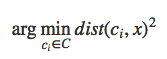

In [ ]:
#to find the distance between the points and centroids
for point in data:
    distances = []
    for index in self.centroids:
        
        distances.append(self.euclidean_distance(point,self.centroids[index]))
                
         #find which cluster the datapoint belongs to by finding the minimum dist
        cluster_index = distances.index(min(distances))
        self.classes[cluster_index].append(point)


**Finding the new centroid from the clustered group of points**

- This is done by taking an average of all points assigned to that cluster.
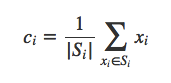

Si is the set of all points assigned to the ith cluster.

### Implementation of Kmeans 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
class K_Means():
    
    def __init__(self, k=3, max_iterations = 1000):
        self.k = k
        self.max_iterations = max_iterations 
    
    #distance between points    
    def euclidean_distance(self,x1,x2):
        
            dist = math.sqrt((x1[0]-x2[0])**2 + (x1[1]- x2[1])**2)
            return dist

    def fit(self, data):
        
        #taking the first K points from the dataset as the initial centroids
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        for i in range(self.max_iterations):
            #create classifications of size of K
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []#empty them
                
            #find the distance between the points and the centroids
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                
                #find which cluster the datapoint belongs to by finding the minimum
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
                
            #now that we have classified the datapoints into clusters, we need to again 
            #find new centroid by taking the centroid of the points in the cluster class
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)
                

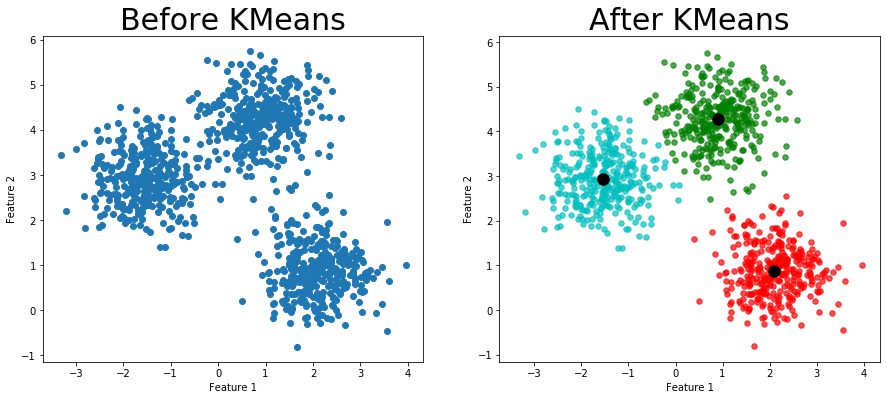

In [2]:

def main():
    
    #generating dummy cluster datasets of size =300
    K = 3 
    X, y_true = make_blobs(n_samples=1000, centers=K,
                           cluster_std=0.60, random_state=0)
    
    #using the     
    k_means = K_Means(K)
    
    k_means.fit(X)#using the fit method from K_Means class
    
    #PLotting original data (before KMeans)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121)
    ax.scatter(X[:,0],X[:,1])
    fs = 30
    ax.set_title("Before KMeans",fontsize =fs)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
    # Plotting of the clusters and centroids
    ax2 = fig.add_subplot(122)
    colors =10*["r", "g", "c","y"]
    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            ax2.scatter(features[0], features[1], color = color,s = 30,alpha =0.7)
            
            
    for centroid in k_means.centroids:
        ax2.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130,c='black', marker = "o" )
        ax2.set_title("After KMeans",fontsize = fs)
        ax2.set_xlabel("Feature 1")
        ax2.set_ylabel("Feature 2")
        
if __name__ == "__main__":
    main()

### Running the same dataset with different no of clusters 

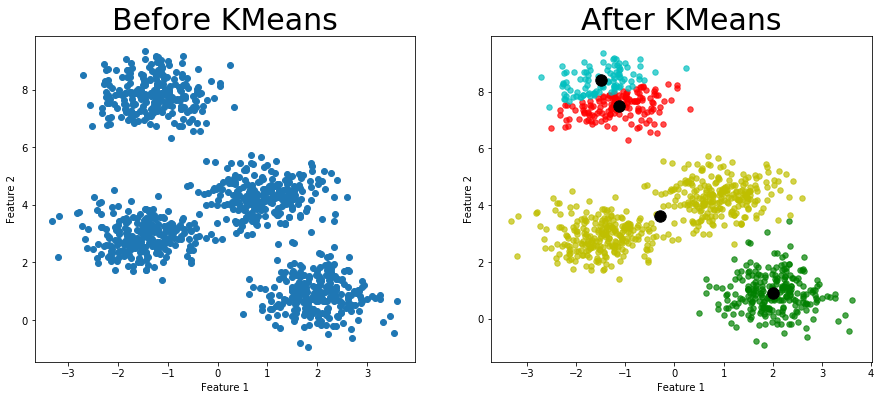

In [4]:
#here no of cluster =4
def main():
    
    #generating dummy cluster datasets of size =300
    K = 4 
    X, y_true = make_blobs(n_samples=1000, centers=K,
                           cluster_std=0.60, random_state=0)
    
    #using the     
    k_means = K_Means(K)
    
    k_means.fit(X)#using the fit method from K_Means class
    
    #PLotting original data (before KMeans)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121)
    ax.scatter(X[:,0],X[:,1])
    fs = 30
    ax.set_title("Before KMeans",fontsize =fs)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
    # Plotting of the clusters and centroids
    ax2 = fig.add_subplot(122)
    colors =10*["r", "g", "c","y"]
    for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            ax2.scatter(features[0], features[1], color = color,s = 30,alpha =0.7)
            
            
    for centroid in k_means.centroids:
        ax2.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130,c='black', marker = "o" )
        ax2.set_title("After KMeans",fontsize = fs)
        ax2.set_xlabel("Feature 1")
        ax2.set_ylabel("Feature 2")
        
if __name__ == "__main__":
    main()

From the above visualization, we can see that the optimal number of clusters should be around 3.and choosing a random no of cluseters can make a huge difference. But visualizing the data alone cannot always give the right answer. 

### Elbow Method
There’s a popular method known as elbow method, which is used to determine the optimal value of k to perform clustering. The basic idea behind this method is that it plots the various values of cost with changing k.
The point where this distortion declines the most is the elbow point, which works as an optimal value of k.

Sklearn KMeans class uses kmeans++ as the default method for seeding the algorithm.

### Advantages of k-means clustering
- Simple to implement, and can be implemented without using frameworks.
- The algorithm is known to easily adapt to new examples.
- The algorithm is fast and efficient in terms of computational cost


### Disadvantages of k-means clustering
- Choosing k manually. 
- Clustering data of varying sizes and density. 
- Outliers must be removed before clustering, or they may affect the position of the centroid or make a new cluster of their own.
- As the value of k increases, other algorithms need to be applied to give better values for the initial centroids.
- As the number of dimensions increases, the difficulty in getting the algorithm to converge increases due to the curse of dimensionality, discussed above.
- If there is overlapping between clusters, k-means doesn’t have an intrinsic measure for uncertainty; thus it’s difficult to identify which points in the overlapping region should be assigned to which class.

### REFERENCES

- [Kmeans](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)
- [Kmeans_stanford](http://cs229.stanford.edu/notes-spring2019/cs229-notes7a.pdf)